In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# LAB 2: DATA PREP

# B: Processing

In [ ]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [ ]:
df_original = df

In [ ]:
month_map = {"jan": 0,"feb": 1,"mar": 2,"apr": 3,"may": 4,"jun": 5,"jul": 6,"aug": 7,"sep": 8,"oct": 9,"nov": 10,"dec": 11}
df['month'] = df['month'].replace(month_map)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


In [ ]:
print("job" , df['job'].count())
print("marital" , df['marital'].count())
print("education" , df['education'].count())
print("housing" , df['housing'].count())
print("loan" , df['loan'].count())
print("contact" , df['contact'].count())
print("campaign" , df['campaign'].count())
print("previous" , df['previous'].count())
print("poutcome" , df['poutcome'].count())
print("subscribed" , df['subscribed'].count())

job 1990
marital 2000
education 1896
housing 2000
loan 2000
contact 1809
campaign 2000
previous 2000
poutcome 1546
subscribed 2000


We can see that job, education, contact and poutcome all have missing or NA values so we will deal with these first by performing one hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['job', 'education', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,8,327,2,-1,0,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,8,1334,2,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,8,231,1,-1,0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,8,185,1,-1,0,yes,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1999,40.0,married,no,6403,no,no,22,8,208,2,-1,0,yes,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


After this we then one hot encode all the other data : martialm housing,loan,campaign,previous and subscribed

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,392,1,3,957,2,131,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,688,1,3,233,2,133,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,1035,1,3,126,2,239,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,398,1,3,274,1,238,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,1004,1,3,479,1,307,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.isna().sum()

age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_married         0
marital_single          0
default_yes             0
housing_yes             0
loan_yes                0
subscribed_yes          0
dtype: int64

# C: Treatment of Missing Values

As we can see the only missing values we have are now with age. This makes up 12 values out of the given 2000

As this value of missing ages is low we can keep this attribute as there is not a large enough amount of missing data to effect the overall result

It would be unaccurate to use the median to try and calcualte the age of the missing values so I am going to use marital status job status to do this

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


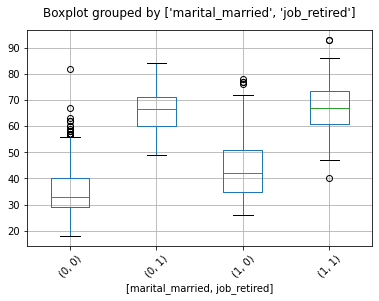

In [ ]:
df.boxplot(column='age', by=['marital_married','job_retired'], rot=45)
plt.title("")
plt.show()

In [ ]:
ptable = df.pivot_table(values='age', 
                        index='marital_married',
                        columns='job_retired',
                        aggfunc=np.median)
ptable

job_retired,0,1
marital_married,,
0,33.0,66.5
1,42.0,67.0


In [ ]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['marital_married'], x['job_retired']]

# Replace missing age values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [ ]:
df.isna().sum()


age                    0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
education_secondary    0
education_tertiary     0
education_nan          0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

As we can see this has rectified out missing values in the dataset and from the plot above it is clear that this may give an accurate representation based on the age group. There is a clear distinction between each group and their ages

In order to rescale the months and days into a more linear range of -1 to 1 I am going to perform a transformations on these data items using sine and cosine.

In [ ]:
df['sinM'] = np.sin(2 * np.pi * df['month'] / max(df['month'])) 
df['cosM'] = np.cos(2 * np.pi * df['month'] / max(df['month']))
df['cinD'] = np.sin(2 * np.pi * df['day'] / max(df['day'])) 
df['cosD'] = np.cos(2 * np.pi * df['day'] / max(df['day']))
df = df.drop(columns=['month', 'day'])

In [ ]:
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,sinM,cosM,cinD,cosD
0,32.0,392,957,2,131,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0.989821,-0.142315,0.201299,0.97953
1,39.0,688,233,2,133,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0.989821,-0.142315,0.201299,0.97953
2,59.0,1035,126,2,239,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0.989821,-0.142315,0.201299,0.97953
3,47.0,398,274,1,238,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0.989821,-0.142315,0.201299,0.97953
4,54.0,1004,479,1,307,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0.989821,-0.142315,0.201299,0.97953


# D. Apply Scaler to Rescaling Features

By performing hot encording some values were scaled ( between 0 - 1 ). Along with the months above.

However still some values need to be scaled.

Age, balance, duration,pdays,previous and campaign. 

To get a better look and understand what kind of scaling needs to be done I am going to plot these in seperate graphs and examine their distribution


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


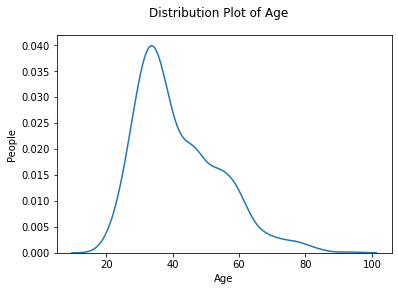

In [ ]:
sns.distplot(df['age'], hist=False)
plt.suptitle("Distribution Plot of Age")
plt.xlabel('Age')
plt.ylabel('People')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


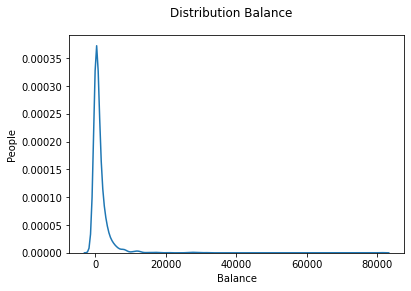

In [ ]:
sns.distplot(df['balance'], hist=False)
plt.suptitle("Distribution Balance")
plt.xlabel('Balance')
plt.ylabel('People')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


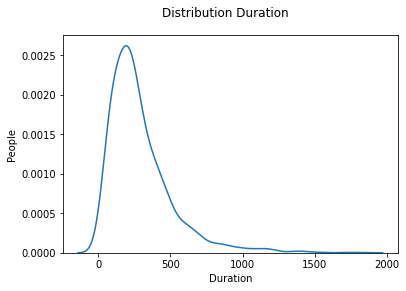

In [ ]:
sns.distplot(df['duration'], hist=False)
plt.suptitle("Distribution Duration")
plt.xlabel('Duration')
plt.ylabel('People')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


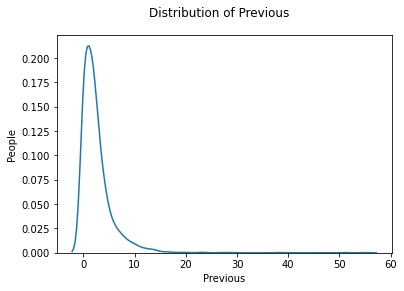

In [ ]:
sns.distplot(df['previous'], hist=False)
plt.suptitle("Distribution of Previous")
plt.xlabel('Previous')
plt.ylabel('People')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


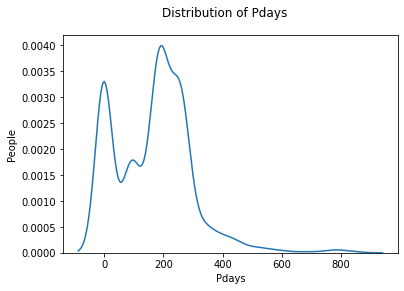

In [ ]:
sns.distplot(df['pdays'], hist=False)
plt.suptitle("Distribution of Pdays")
plt.xlabel('Pdays')
plt.ylabel('People')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


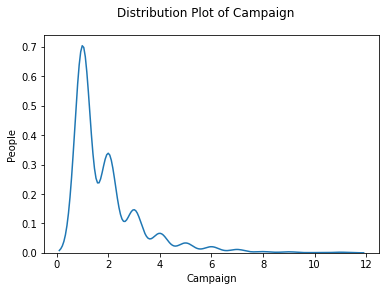

In [ ]:
sns.distplot(df['campaign'], hist=False)
plt.suptitle("Distribution Plot of Campaign")
plt.xlabel('Campaign')
plt.ylabel('People')
plt.show()

From my analysis of the graphs I feel that age, duration and pdays all appear to have a normal distribution with very little outliers.I will apply the standard scaler to these columns

The remaining graphs, balance, previous and campaign however have more outliers. I will apply the robust scalar to these columns

In [ ]:
standard = StandardScaler()
df[['age','duration','pdays']] = standard.fit_transform(df[['age','duration','pdays']])

In [ ]:
robust = RobustScaler()
df[['balance','previous','campaign']] = robust.fit_transform(df[['balance','previous','campaign']])

In [ ]:
df.max()

age                     4.035024
balance                55.892585
duration                6.911812
campaign               10.000000
pdays                   5.208760
previous               26.500000
job_blue-collar         1.000000
job_entrepreneur        1.000000
job_housemaid           1.000000
job_management          1.000000
job_retired             1.000000
job_self-employed       1.000000
job_services            1.000000
job_student             1.000000
job_technician          1.000000
job_unemployed          1.000000
job_nan                 1.000000
education_secondary     1.000000
education_tertiary      1.000000
education_nan           1.000000
contact_telephone       1.000000
contact_nan             1.000000
poutcome_other          1.000000
poutcome_success        1.000000
poutcome_nan            1.000000
marital_married         1.000000
marital_single          1.000000
default_yes             1.000000
housing_yes             1.000000
loan_yes                1.000000
subscribed

# E: Treatment of outliers

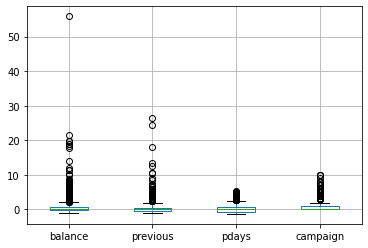

In [ ]:
df.boxplot(column=['balance','previous','pdays','campaign'])
plt.show()

Balance and previous have the largests outliers. pdays and campaign have some outliers too but these do not have as great an effect as the others.

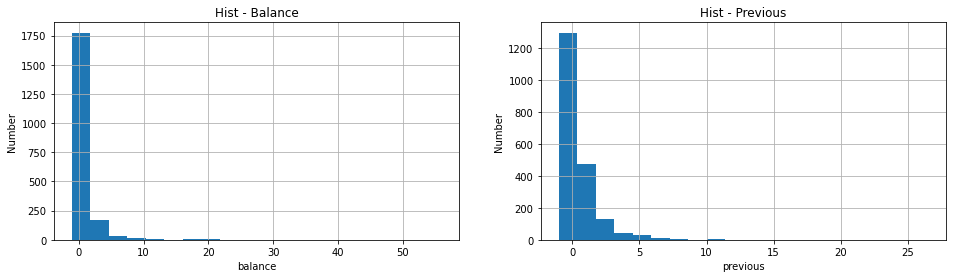

In [ ]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Hist - Balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Hist - Previous")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number')
df['previous'].hist(bins=20)

plt.show()

From the examination of these graphs it is clear that there is a left skew in the data indicating the presence of outliers. For AI models is it best to have these skewes rectified

In [ ]:
df[['balance', 'previous']].min()

balance    -1.060984
previous   -1.000000
dtype: float64

In [ ]:
As these values are negative we use a log function to treat outliers.

In [ ]:
df['balance'] = np.log(df['balance'] + 2.06)
df['previous'] = np.log(df['previous'] + 2.0)

I adjsuted the graphs by 2.06 and 2.0 to ensure they start at the zero mark

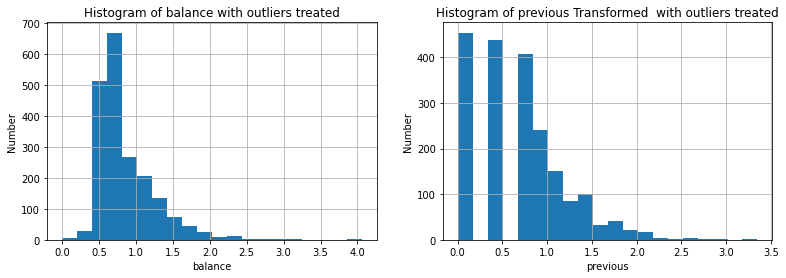

In [ ]:
# Create figure with two subplots
fig = plt.figure(figsize=(13,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance with outliers treated")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of previous Transformed  with outliers treated")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number')
df['previous'].hist(bins=20)

plt.show()

As we can see this has now rectified the outliers 

In [ ]:
df.max()

age                     4.035024
balance                 4.059625
duration                6.911812
campaign               10.000000
pdays                   5.208760
previous                3.349904
job_blue-collar         1.000000
job_entrepreneur        1.000000
job_housemaid           1.000000
job_management          1.000000
job_retired             1.000000
job_self-employed       1.000000
job_services            1.000000
job_student             1.000000
job_technician          1.000000
job_unemployed          1.000000
job_nan                 1.000000
education_secondary     1.000000
education_tertiary      1.000000
education_nan           1.000000
contact_telephone       1.000000
contact_nan             1.000000
poutcome_other          1.000000
poutcome_success        1.000000
poutcome_nan            1.000000
marital_married         1.000000
marital_single          1.000000
default_yes             1.000000
housing_yes             1.000000
loan_yes                1.000000
subscribed

# F: Creation of new Features